In [2]:
import pandas as pd
import numpy as np

In [3]:
training_data=pd.read_csv("training_sample.csv")
training_data=training_data[['UserID',"basket_add_detail",'promo_banner_click',"sign_in","saw_homepage","returning_user","ordered"]]
training_data.to_csv("training_sample_subset.csv")

In [4]:
training_data.head(5)

,UserID,basket_add_detail,promo_banner_click,sign_in,saw_homepage,returning_user,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,0,1,1,0,1


In [5]:
#Seperating dependent and independent variables
X=training_data[["basket_add_detail",'promo_banner_click',"sign_in","saw_homepage","returning_user"]]
y=training_data[["ordered"]]

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
propensity_model = LogisticRegression()

# fit the model with data
propensity_model.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [8]:
#predict for test dataset
y_pred=propensity_model.predict(X_test)

In [9]:
#evaluate the model fit
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9693107658255088

In [10]:
#save the pickle file to be loaded in the streamlit app
import pickle
  
with open("propensity_model.pkl", 'wb') as pfile:  
    pickle.dump(propensity_model, pfile)

In [11]:
#QC
import pickle
  
with open("propensity_model.pkl", 'rb') as pfile:  
    propensity_model_loaded=pickle.load(pfile)

y_reloaded=propensity_model_loaded.predict(X_test)
metrics.accuracy_score(y_test, y_reloaded)

0.9693107658255088

In [12]:
chart = alt.Chart(training_sample_subset).mark_bar().encode(
    alt.X("ordered", bin=True),
    y='count()',
    )
    st.altair_chart(chart)

IndentationError: unexpected indent (<ipython-input-12-be332c9613fd>, line 5)

<AxesSubplot:>

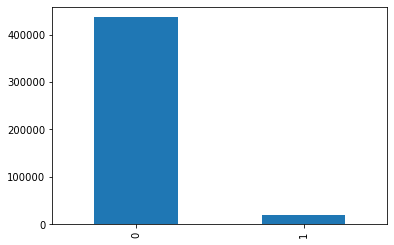

In [20]:
training_data["ordered"].value_counts().plot(kind="bar")